

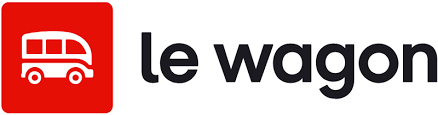



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Voici les liens vers toutes les tables dont vous aurez besoin pour cet exercice**

[customers](https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/customers.csv)

[orders](https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/orders.csv)

[products](https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/products.csv)

[reviews](https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/reviews.csv)

**[Ici](https://docs.google.com/document/d/11OjoSgwxq1ncfvUyI9MUEykWux3taaaB/edit?usp=sharing&ouid=118418936069378180520&rtpof=true&sd=true) vous retrouverez un document explicitant toutes les tables et données présentes dans vos datasets**

Vous travaillez dans l'équipe data de GreenThumb. Votre objectif sera de travailler avec les données de l'entreprise pour explorer la donnée et valider ou invalider une hypothèse.

# 1. Découverte de la donnée

Vous souhaitez analyser les ventes de produits de GreenThumb.

- Quelles données allez-vous utiliser ?

- Utilisez Pandas pour charger ces tables et enregistrez-les dans les variables **sales_df** et **products_df**

In [4]:
sales_df = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/orders.csv")
products_df = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/products.csv")



In [18]:
print(sales_df.head())
sales_df.info()

   OrderID        Date  CustomerID  ProductID  NumberOfUnits
0   770424  2023-06-10        3755          1              2
1   767697  2023-06-07        1037          4              2
2   435633  2021-02-12         107         24              2
3   803734  2023-07-27        3585         14              1
4   896187  2023-11-12        3283         10              1
<class 'pandas.core.frame.DataFrame'>
Index: 942305 entries, 0 to 951704
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   OrderID        942305 non-null  int64 
 1   Date           942305 non-null  object
 2   CustomerID     942305 non-null  int64 
 3   ProductID      942305 non-null  int64 
 4   NumberOfUnits  942305 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 43.1+ MB


In [17]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     25 non-null     int64 
 1   ProductName   25 non-null     object
 2   LaunchDate    25 non-null     object
 3   ProductDesc   25 non-null     object
 4   ProductCat    25 non-null     object
 5   PlantType     25 non-null     object
 6   Tier          25 non-null     object
 7   InitialPrice  25 non-null     int64 
dtypes: int64(2), object(6)
memory usage: 1.7+ KB


Vérifiez s'il y a des doublons ou des valeurs manquantes dans les dataframes **sales_df** et **products_df**.

Si vous en trouvez, corrigez-les en utilisant des méthodes Python.

In [7]:
print("Doublons dans sales_df :", sales_df.duplicated().sum())


Doublons dans sales_df : 9400


In [21]:
sales_df = sales_df.drop_duplicates()


In [23]:
print("Valeurs manquantes dans sales_df :\n", sales_df.isnull().sum())


Valeurs manquantes dans sales_df :
 OrderID          0
Date             0
CustomerID       0
ProductID        0
NumberOfUnits    0
dtype: int64


In [25]:
print("Doublons dans products_df :", products_df.duplicated().sum())
print("Valeurs manquantes dans products_df :\n", products_df.isnull().sum())



Doublons dans products_df : 0
Valeurs manquantes dans products_df :
 ProductID       0
ProductName     0
LaunchDate      0
ProductDesc     0
ProductCat      0
PlantType       0
Tier            0
InitialPrice    0
dtype: int64


Utilisez Python pour effectuer une jointure entre les dataframes **sales_df** et **products_df**. Enregistrez le résultat dans un nouveau dataframe nommé **prod_sales_df**.

In [35]:
prod_sales_df = sales_df.merge(products_df, on="ProductID", how="inner")
prod_sales_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942305 entries, 0 to 942304
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   OrderID        942305 non-null  int64 
 1   Date           942305 non-null  object
 2   CustomerID     942305 non-null  int64 
 3   ProductID      942305 non-null  int64 
 4   NumberOfUnits  942305 non-null  int64 
 5   ProductName    942305 non-null  object
 6   LaunchDate     942305 non-null  object
 7   ProductDesc    942305 non-null  object
 8   ProductCat     942305 non-null  object
 9   PlantType      942305 non-null  object
 10  Tier           942305 non-null  object
 11  InitialPrice   942305 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 86.3+ MB


Utilisez UNE méthode Python pour extraire toutes les statistiques du dataframe **prod_sales_df** (moyenne, nombre de valeurs, déviation standard, etc.).

In [28]:
prod_sales_df.describe()


,OrderID,CustomerID,ProductID,NumberOfUnits,InitialPrice
count,942305.000000,942305.000000,942305.000000,942305.000000,942305.000000
mean,471141.985217,1595.044130,11.959089,3.681724,39.389310
std,272014.003511,1213.633479,7.123611,7.094185,43.164596
min,1.000000,1.000000,1.000000,-1.000000,5.000000
25%,235570.000000,541.000000,6.000000,1.000000,6.000000
50%,471143.000000,1292.000000,11.000000,1.000000,10.000000
75%,706712.000000,2617.000000,18.000000,4.000000,68.000000
max,942283.000000,4075.000000,25.000000,558.000000,126.000000


Il semble qu'il y ait une valeur aberrante dans l'une des colonnes. Identifiez cette colonne et supprimez les lignes contenant la valeur aberrante.

In [32]:
outliers = prod_sales_df[prod_sales_df["NumberOfUnits"] < 0]
outliers.info()


<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 1544 to 941087
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OrderID        951 non-null    int64 
 1   Date           951 non-null    object
 2   CustomerID     951 non-null    int64 
 3   ProductID      951 non-null    int64 
 4   NumberOfUnits  951 non-null    int64 
 5   ProductName    951 non-null    object
 6   LaunchDate     951 non-null    object
 7   ProductDesc    951 non-null    object
 8   ProductCat     951 non-null    object
 9   PlantType      951 non-null    object
 10  Tier           951 non-null    object
 11  InitialPrice   951 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 96.6+ KB


In [37]:
prod_sales_df = prod_sales_df[prod_sales_df["NumberOfUnits"] >= 0]
prod_sales_df.info()
print(prod_sales_df.describe())



<class 'pandas.core.frame.DataFrame'>
Index: 941354 entries, 0 to 942304
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   OrderID        941354 non-null  int64 
 1   Date           941354 non-null  object
 2   CustomerID     941354 non-null  int64 
 3   ProductID      941354 non-null  int64 
 4   NumberOfUnits  941354 non-null  int64 
 5   ProductName    941354 non-null  object
 6   LaunchDate     941354 non-null  object
 7   ProductDesc    941354 non-null  object
 8   ProductCat     941354 non-null  object
 9   PlantType      941354 non-null  object
 10  Tier           941354 non-null  object
 11  InitialPrice   941354 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 93.4+ MB
             OrderID     CustomerID      ProductID  NumberOfUnits  \
count  941354.000000  941354.000000  941354.000000  941354.000000   
mean   471148.678055    1595.049680      11.958704       3.686454   
std    272012.005672

Quelle est la répartition des ventes de produits par catégorie ? Utilisez la bibliothèque de votre choix pour créer un graphique représentant cette répartition.

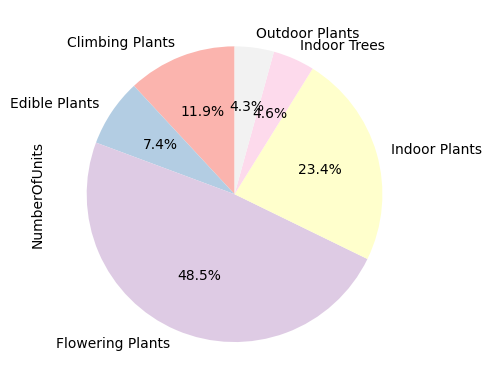

In [42]:
import matplotlib.pyplot as plt
sales_by_category = prod_sales_df.groupby("ProductCat")["NumberOfUnits"].sum()
sales_by_category.plot(kind="pie", autopct='%1.1f%%', startangle=90, cmap="Pastel1")
plt.show()


# 2. Analyse exploratoire de la donnée


L'objectif de GreenThumb est d'améliorer ses performances de ventes. Voici quelques pistes possibles :

- Se concentrer sur certaines catégories de produits
- Se focaliser sur certaines gammes de prix
- Proposer des réductions aux clients après un certain nombre d'achats

**Tâches :**

- Utilisez les tables disponibles pour mener une analyse exploratoire sur l'une de ces pistes afin de déterminer si elle peut améliorer les ventes de GreenThumb.

- Étayer vos propos avec au moins un graphique conforme aux normes WCAG.
Utilisez des tests statistiques si cela est pertinent.
La conclusion peut être que cette piste n'est pas la bonne.

**Livrables :**

- Graphique(s) pour appuyer votre analyse.


[Argumentez votre conclusion ici et proposez au moins un graphique]

In [44]:
sales_by_tier = prod_sales_df.groupby("Tier").agg({
    "NumberOfUnits": "sum",
    "InitialPrice": "mean"
}).rename(columns={"NumberOfUnits": "TotalUnitsSold", "InitialPrice": "AveragePrice"})
sales_by_tier

,TotalUnitsSold,AveragePrice
Tier,,
Basic,1667445,6.681803
Premium,1235178,91.480880
Standard,567635,21.828668


from matplotlib import pyplot as plt
sales_by_tier['TotalUnitsSold'].plot(kind='hist', bins=20, title='TotalUnitsSold')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_by_tier['AveragePrice'].plot(kind='hist', bins=20, title='AveragePrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_by_tier.plot(kind='scatter', x='TotalUnitsSold', y='AveragePrice', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_by_tier['TotalUnitsSold'].plot(kind='line', figsize=(8, 4), title='TotalUnitsSold')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sales_by_tier['AveragePrice'].plot(kind='line', figsize=(8, 4), title='AveragePrice')
plt.gca().spines[['top', 'right']].set_visible(False)

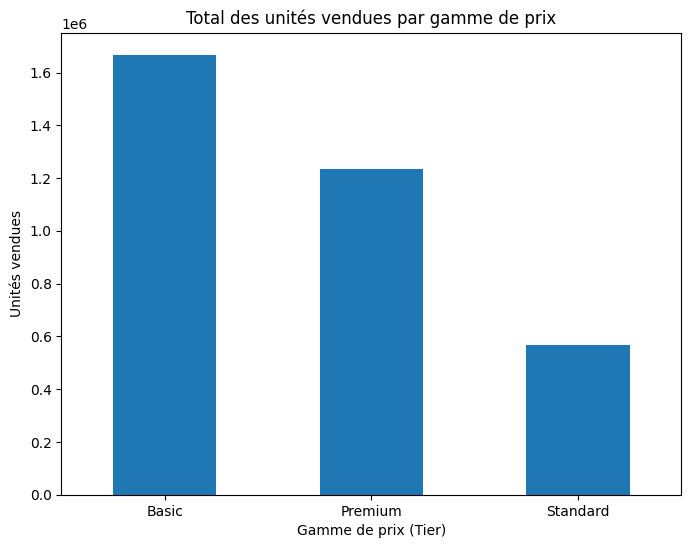

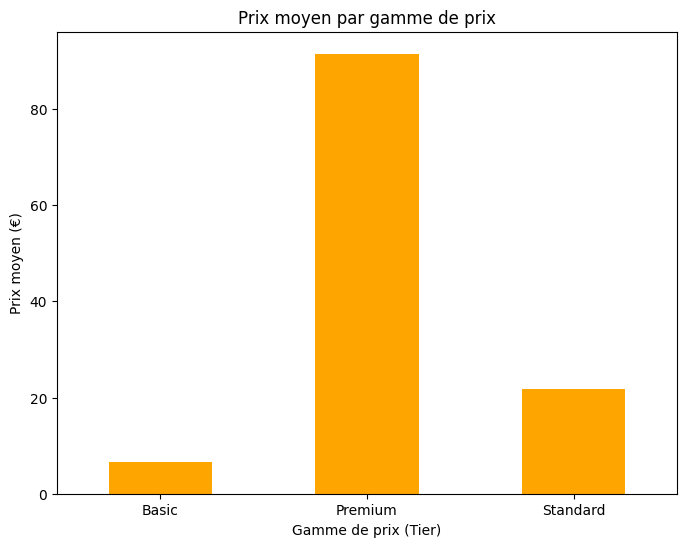

In [45]:
sales_by_tier["TotalUnitsSold"].plot(kind="bar", figsize=(8, 6), rot=0)
plt.title("Total des unités vendues par gamme de prix")
plt.xlabel("Gamme de prix (Tier)")
plt.ylabel("Unités vendues")
plt.show()

sales_by_tier["AveragePrice"].plot(kind="bar", color="orange", figsize=(8, 6), rot=0)
plt.title("Prix moyen par gamme de prix")
plt.xlabel("Gamme de prix (Tier)")
plt.ylabel("Prix moyen (€)")
plt.show()


Performance par gamme de prix :
Basic :
La gamme "Basic" a généré le plus grand nombre d'unités vendues (1667445).
Son prix moyen est relativement bas (6.68 €), ce qui peut expliquer son volume élevé.
Premium :
La gamme "Premium" a un volume d'unités vendues significatif (1235178) malgré un prix moyen très élevé (91.48 €).
Cela montre un potentiel d'attractivité pour des produits haut de gamme.
Standard :
La gamme "Standard" a le volume le plus faible (567635) avec un prix moyen de 21.83 €. Cette gamme pourrait nécessiter une stratégie pour augmenter ses ventes.



Recommandations :
Se concentrer sur la gamme "Basic" :

Maintenir les efforts marketing sur cette gamme pour conserver son volume élevé.

Augmenter les ventes de la gamme "Standard" :

Explorer les raisons du faible volume
Réduire légèrement le prix ou mettre en avant des promotions pour stimuler l'intérêt des clients.

Capitaliser sur la gamme "Premium" :

